In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt

In [49]:
covid = pd.read_csv("updated_Covid19Data.csv")
covid.head()

,Unnamed: 0,Date,Total cases,New cases,Total recovered,Total deaths,New deaths
0,0,2020-01-30,1,1,0,0,0
1,1,2020-01-31,1,0,0,0,0
2,2,2020-02-01,1,0,0,0,0
3,3,2020-02-02,2,1,0,0,0
4,4,2020-02-03,2,0,0,0,0


In [50]:
covid.tail()

,Unnamed: 0,Date,Total cases,New cases,Total recovered,Total deaths,New deaths
296,296,2020-11-21,9050597,46232,8519872,132726,564
297,297,2020-11-22,9095806,45209,8561277,133227,501
298,298,2020-11-23,9139865,44059,8603472,133738,511
299,299,2020-11-24,9177840,37975,8641237,134218,480
300,300,2020-11-25,9222216,44376,8677819,134699,481


In [51]:
print("Size/Shape of the dataset ", covid.shape)
print("Checking for null values ", covid.isnull().sum())
print("Checking Data - type ", covid.dtypes)

Size/Shape of the dataset  (301, 7)
Checking for null values  Unnamed: 0         0
Date               0
Total cases        0
New cases          0
Total recovered    0
Total deaths       0
New deaths         0
dtype: int64
Checking Data - type  Unnamed: 0          int64
Date               object
Total cases         int64
New cases           int64
Total recovered     int64
Total deaths        int64
New deaths          int64
dtype: object


In [52]:
#Dropping
covid.drop(covid.columns[covid.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [53]:
covid.head()

,Date,Total cases,New cases,Total recovered,Total deaths,New deaths
0,2020-01-30,1,1,0,0,0
1,2020-01-31,1,0,0,0,0
2,2020-02-01,1,0,0,0,0
3,2020-02-02,2,1,0,0,0
4,2020-02-03,2,0,0,0,0


In [54]:
covid["Date"] = pd.to_datetime(covid["Date"])

In [55]:
covid["Date"]

0     2020-01-30
1     2020-01-31
2     2020-02-01
3     2020-02-02
4     2020-02-03
         ...    
296   2020-11-21
297   2020-11-22
298   2020-11-23
299   2020-11-24
300   2020-11-25
Name: Date, Length: 301, dtype: datetime64[ns]

In [56]:
#grouping different types of cases as per the date
datewise = covid.groupby(["Date"]).agg({"Total cases":"sum","Total recovered":"sum","Total deaths":"sum"})

In [57]:
print("Basic Information")
print("Total number of infected cases around the world", datewise["Total cases"].iloc[-1])
print("Total number of recovered cases around the world", datewise["Total recovered"].iloc[-1])
print("Total number of deaths around the world", datewise["Total deaths"].iloc[-1])
print("Total number of active cases around the world",(datewise["Total cases"].iloc[-1] - datewise["Total recovered"].iloc[-1] - datewise["Total deaths"].iloc[-1]))
print("Total number of closed cases around the world",(datewise["Total recovered"].iloc[-1] + datewise["Total deaths"].iloc[-1]))

Basic Information
Total number of infected cases around the world 9222216
Total number of recovered cases around the world 8677819
Total number of deaths around the world 134699
Total number of active cases around the world 409698
Total number of closed cases around the world 8812518


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

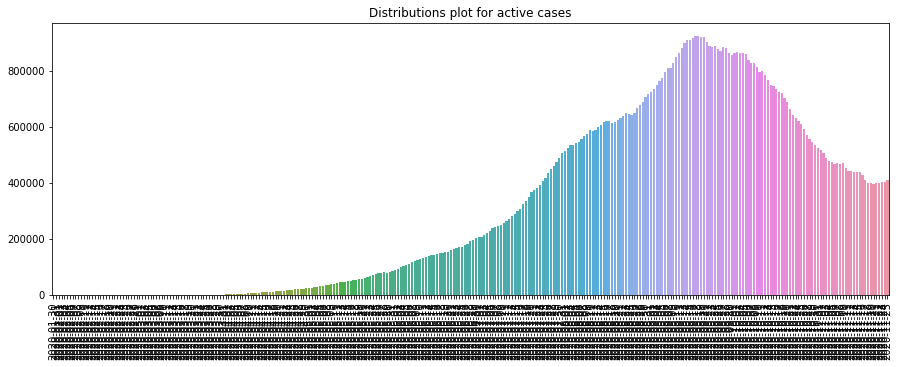

In [58]:
plt.figure(figsize = (15, 5))
sns.barplot(x = datewise.index.date, y = datewise["Total cases"] - datewise["Total recovered"] - datewise["Total deaths"])
plt.title("Distributions plot for active cases")
plt.xticks(rotation = 90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

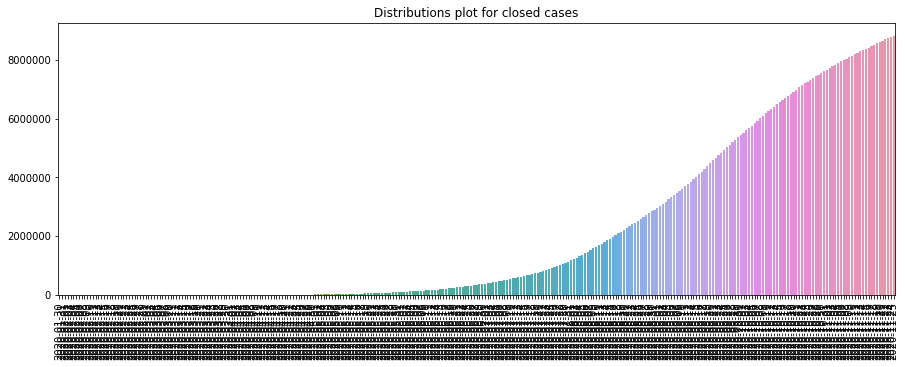

In [59]:
plt.figure(figsize = (15, 5))
sns.barplot(x = datewise.index.date, y = datewise["Total recovered"] + datewise["Total deaths"])
plt.title("Distributions plot for closed cases")
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'Weekly progress of different types of cases')

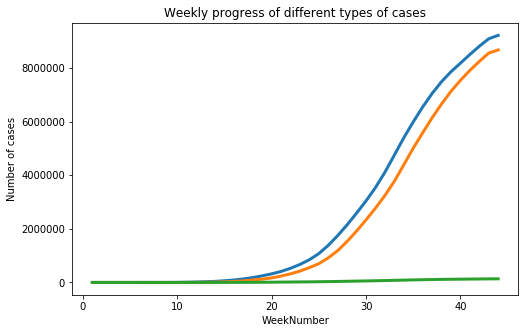

In [60]:
datewise["WeekofYear"] = datewise.index.weekofyear
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
w = 1
for i in list(datewise["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"] == i]["Total cases"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"] == i]["Total recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"] == i]["Total deaths"].iloc[-1])
    week_num.append(w)
    w = w + 1
plt.figure(figsize = (8, 5))
plt.plot(week_num, weekwise_confirmed, linewidth = 3)
plt.plot(week_num, weekwise_recovered, linewidth = 3)
plt.plot(week_num, weekwise_deaths, linewidth = 3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly progress of different types of cases")

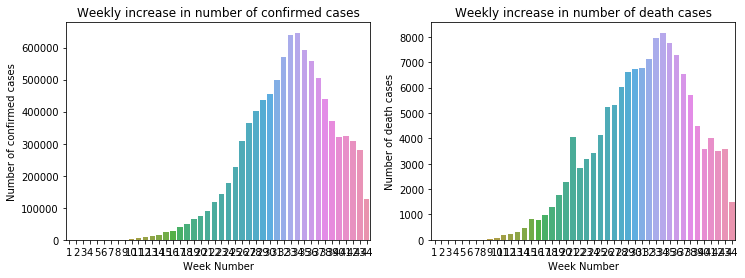

In [61]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
sns.barplot(x = week_num, y = pd.Series(weekwise_confirmed).diff().fillna(0), ax = ax1)
sns.barplot(x = week_num, y = pd.Series(weekwise_deaths).diff().fillna(0), ax = ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of confirmed cases")
ax2.set_ylabel("Number of death cases")
ax1.set_title("Weekly increase in number of confirmed cases")
ax2.set_title("Weekly increase in number of death cases")
plt.show()


Average increase in number of confirmed cases everyday: 30639.0
Average increase in number of recovered cases everyday: 28830.0
Average increase in number of death cases everyday: 448.0


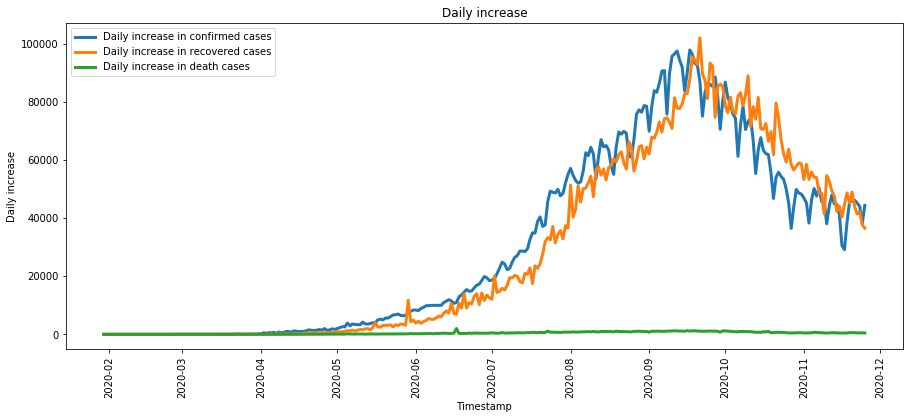

In [62]:
print("Average increase in number of confirmed cases everyday:",np.round(datewise["Total cases"].diff().fillna(0).mean()))
print("Average increase in number of recovered cases everyday:",np.round(datewise["Total recovered"].diff().fillna(0).mean()))
print("Average increase in number of death cases everyday:",np.round(datewise["Total deaths"].diff().fillna(0).mean()))

plt.figure(figsize = (15, 6))
plt.plot(datewise["Total cases"].diff().fillna(0), label = "Daily increase in confirmed cases", linewidth = 3)
plt.plot(datewise["Total recovered"].diff().fillna(0), label = "Daily increase in recovered cases", linewidth = 3)
plt.plot(datewise["Total deaths"].diff().fillna(0), label = "Daily increase in death cases", linewidth = 3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation = 90)
plt.show()

In [63]:
model_train = datewise.iloc[:int(datewise.shape[0] * 0.85)]
valid = datewise.iloc[int(datewise.shape[0] * 0.85):]

In [64]:
holt = Holt(np.asarray(model_train["Total cases"])).fit(smoothing_level = 1.4, smoothing_slope = 0.2)
y_pred = valid.copy()
y_pred["Holt"] = holt.forecast(len(valid))

In [80]:
holt_new_date = []
holt_new_prediction1 = []
for i in range(1, 100):
    holt_new_date.append(datewise.index[-1] + timedelta(days = i))
    holt_new_prediction1.append(holt.forecast((len(valid) + i))[-1])
table1 = []
for d, c in zip(holt_new_date, holt_new_prediction1):
    table1.append([d, c])
table1 = np.array(table1)
print(table1)

[[Timestamp('2020-11-26 00:00:00') 153050.0887970369]
 [Timestamp('2020-11-27 00:00:00') 154021.52535597247]
 [Timestamp('2020-11-28 00:00:00') 154992.961914908]
 [Timestamp('2020-11-29 00:00:00') 155964.39847384355]
 [Timestamp('2020-11-30 00:00:00') 156935.8350327791]
 [Timestamp('2020-12-01 00:00:00') 157907.27159171467]
 [Timestamp('2020-12-02 00:00:00') 158878.70815065023]
 [Timestamp('2020-12-03 00:00:00') 159850.1447095858]
 [Timestamp('2020-12-04 00:00:00') 160821.58126852135]
 [Timestamp('2020-12-05 00:00:00') 161793.0178274569]
 [Timestamp('2020-12-06 00:00:00') 162764.45438639246]
 [Timestamp('2020-12-07 00:00:00') 163735.89094532802]
 [Timestamp('2020-12-08 00:00:00') 164707.32750426355]
 [Timestamp('2020-12-09 00:00:00') 165678.7640631991]
 [Timestamp('2020-12-10 00:00:00') 166650.20062213467]
 [Timestamp('2020-12-11 00:00:00') 167621.63718107023]
 [Timestamp('2020-12-12 00:00:00') 168593.07374000578]
 [Timestamp('2020-12-13 00:00:00') 169564.51029894134]
 [Timestamp('2020

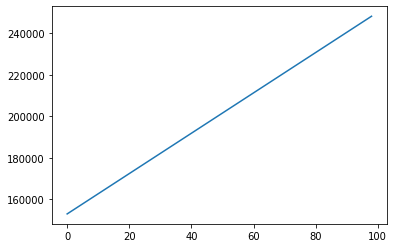

In [81]:
plt.plot(holt_new_prediction1)
plt.show()

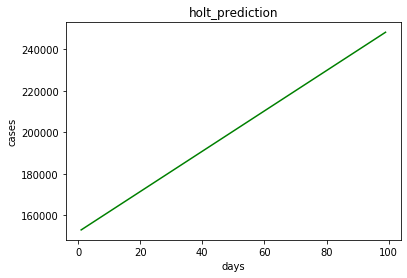

In [84]:
x = np.arange(1, 100)  
y = np.array(holt_new_prediction1) 
  
# plotting 
plt.title("holt_prediction")  
plt.xlabel("days")  
plt.ylabel("cases")  
plt.plot(x, y, color ="green")  

plt.show()

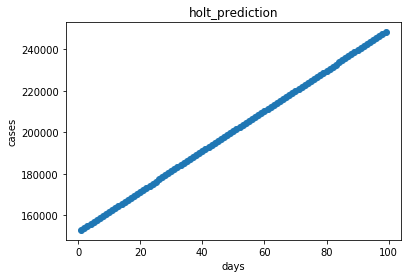

In [85]:
x = np.arange(1, 100)  
y = np.array(holt_new_prediction1) 
  
# plotting 
plt.title("holt_prediction")  
plt.xlabel("days")  
plt.ylabel("cases")  
plt.scatter(x, y)  

plt.show()

In [68]:
holt = Holt(np.asarray(model_train["Total recovered"])).fit(smoothing_level = 1.4, smoothing_slope = 0.2)
y_pred = valid.copy()
y_pred["Holt"] = holt.forecast(len(valid))

In [86]:
holt_new_date = []
holt_new_prediction2 = []
for i in range(1, 100):
    holt_new_date.append(datewise.index[-1] + timedelta(days = i))
    holt_new_prediction2.append(holt.forecast((len(valid) + i))[-1])
table2 = []
for d, c in zip(holt_new_date, holt_new_prediction2):
    table2.append([d, c])
table2 = np.array(table2)
print(table2)

[[Timestamp('2020-11-26 00:00:00') 153050.0887970369]
 [Timestamp('2020-11-27 00:00:00') 154021.52535597247]
 [Timestamp('2020-11-28 00:00:00') 154992.961914908]
 [Timestamp('2020-11-29 00:00:00') 155964.39847384355]
 [Timestamp('2020-11-30 00:00:00') 156935.8350327791]
 [Timestamp('2020-12-01 00:00:00') 157907.27159171467]
 [Timestamp('2020-12-02 00:00:00') 158878.70815065023]
 [Timestamp('2020-12-03 00:00:00') 159850.1447095858]
 [Timestamp('2020-12-04 00:00:00') 160821.58126852135]
 [Timestamp('2020-12-05 00:00:00') 161793.0178274569]
 [Timestamp('2020-12-06 00:00:00') 162764.45438639246]
 [Timestamp('2020-12-07 00:00:00') 163735.89094532802]
 [Timestamp('2020-12-08 00:00:00') 164707.32750426355]
 [Timestamp('2020-12-09 00:00:00') 165678.7640631991]
 [Timestamp('2020-12-10 00:00:00') 166650.20062213467]
 [Timestamp('2020-12-11 00:00:00') 167621.63718107023]
 [Timestamp('2020-12-12 00:00:00') 168593.07374000578]
 [Timestamp('2020-12-13 00:00:00') 169564.51029894134]
 [Timestamp('2020

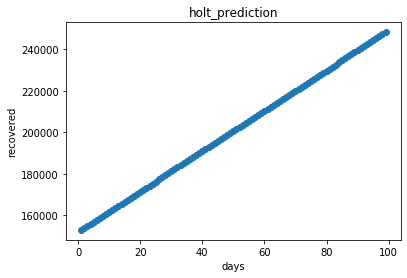

In [98]:
x = np.arange(1, 100)  
y = np.array(holt_new_prediction2) 
  
# plotting 
plt.title("holt_prediction")  
plt.xlabel("days")  
plt.ylabel("recovered")  
plt.scatter(x, y)  

plt.show()

In [71]:
holt = Holt(np.asarray(model_train["Total deaths"])).fit(smoothing_level = 1.4, smoothing_slope = 0.2)
y_pred = valid.copy()
y_pred["Holt"] = holt.forecast(len(valid))

In [87]:
holt_new_date = []
holt_new_prediction3 = []
for i in range(1, 100):
    holt_new_date.append(datewise.index[-1] + timedelta(days = i))
    holt_new_prediction3.append(holt.forecast((len(valid) + i))[-1])
table3 = []
for d, c in zip(holt_new_date, holt_new_prediction3):
    table3.append([d, c])
table3 = np.array(table3)
print(table3)

[[Timestamp('2020-11-26 00:00:00') 153050.0887970369]
 [Timestamp('2020-11-27 00:00:00') 154021.52535597247]
 [Timestamp('2020-11-28 00:00:00') 154992.961914908]
 [Timestamp('2020-11-29 00:00:00') 155964.39847384355]
 [Timestamp('2020-11-30 00:00:00') 156935.8350327791]
 [Timestamp('2020-12-01 00:00:00') 157907.27159171467]
 [Timestamp('2020-12-02 00:00:00') 158878.70815065023]
 [Timestamp('2020-12-03 00:00:00') 159850.1447095858]
 [Timestamp('2020-12-04 00:00:00') 160821.58126852135]
 [Timestamp('2020-12-05 00:00:00') 161793.0178274569]
 [Timestamp('2020-12-06 00:00:00') 162764.45438639246]
 [Timestamp('2020-12-07 00:00:00') 163735.89094532802]
 [Timestamp('2020-12-08 00:00:00') 164707.32750426355]
 [Timestamp('2020-12-09 00:00:00') 165678.7640631991]
 [Timestamp('2020-12-10 00:00:00') 166650.20062213467]
 [Timestamp('2020-12-11 00:00:00') 167621.63718107023]
 [Timestamp('2020-12-12 00:00:00') 168593.07374000578]
 [Timestamp('2020-12-13 00:00:00') 169564.51029894134]
 [Timestamp('2020

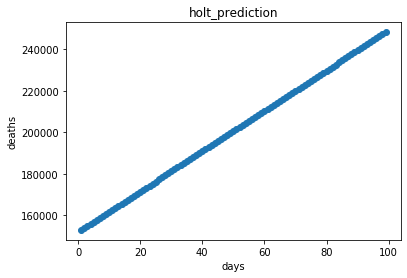

In [100]:
x = np.arange(1, 100)  
y = np.array(holt_new_prediction3) 
  
# plotting 
plt.title("holt_prediction")  
plt.xlabel("days")  
plt.ylabel("deaths")  
plt.scatter(x, y)  

plt.show()

In [97]:
Active_cases = [1] * 100.
for i in range(99):
    Active_cases[i] = holt_new_prediction1[i] - holt_new_prediction2[i] - holt_new_prediction3[i]
print(Active_cases)

TypeError: can't multiply sequence by non-int of type 'float'